# 목차
 * I. 프로젝트 준비단계
 
 * II. 프로젝트 3단계
 
 
 
# 루브릭 평가 기준
 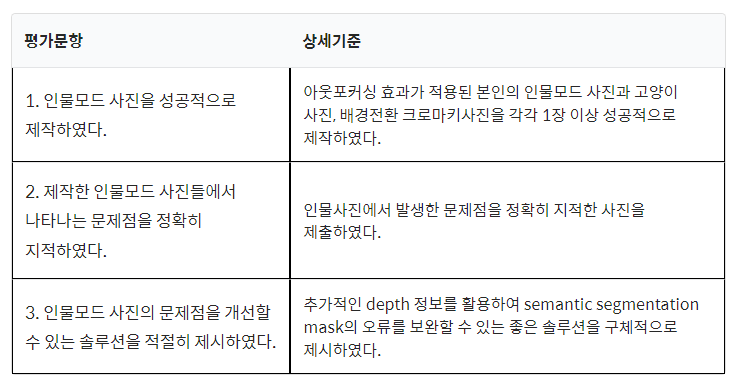

 
# 소감

 프로젝트 준비단계까지는 좋았다. 
 
 아들 사진의 뒷배경을 없애고 강아지를 산으로 바다로 보내는것도 좋았다. 
 
 하지만 저놈의 목뒤에 있는 그림자인지 그것을 없애는 것에는 실패하였다.
 
 다음주 금요일~~~ 잘 한사람것을 보고 공부해야겠다. 
 
 정답이 있어야 겨우 이해하는 내가 한심하지만 그래도 알아듣기라도 하면 좋겠다 ㅠㅠ 
 
 


# 프로젝트 준비

## 7-2. 셜로우 포커스 만들기(1) 사진을 준비하자

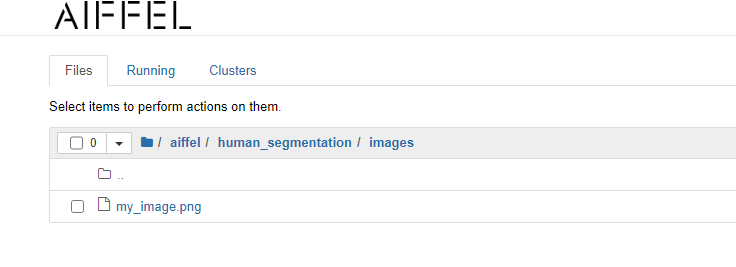

In [1]:
#라이브러리 준비
import os
import urllib #웹에서 데이터를 다운로드할 때 사용
import cv2 #OpenCV 라이브러리로 이미지를 처리하기 위해 필요
import numpy as np
from pixellib.semantic import semantic_segmentation #시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
from matplotlib import pyplot as plt

print('슝=3')

슝=3


(450, 800, 3)


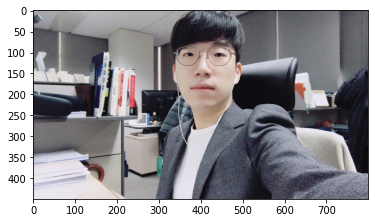

In [2]:
# 준비한 이미지 읽기
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 7-3. 셸로우 포커스 만들기 (2) 세그멘테이션으로 사람 분리하기

==> 이미지에서 픽셀 단위로 관심 객체를 추출하는 방법을 이미지 세그멘테이션(image segmentation) 이라고 합니다

### 1> 시맨틱 세그멘테이션(semantic segmentation)이란?
세그멘테이션 중에서도 특히 우리가 인식하는 세계처럼 물리적 의미 단위로 인식하는 세그멘테이션을 시맨틱 세그멘테이션 이라고 합니다. 

쉽게 설명하면 이미지에서 픽셀을 사람, 자동차, 비행기 등의 물리적 단위로 분류(classification)하는 방법이라고 이해하시면 됩니다. 

오늘 다룰 세그멘테이션 방법이기도 하죠.

### 2> 인스턴스 세그멘테이션(Instance segmentation)이란?
시맨틱 세그멘테이션은 '사람'이라는 추상적인 정보를 이미지에서 추출해 내는 방법입니다. 

그래서 사람이 누구인지 관계없이 같은 라벨로 표현이 됩니다.

더 나아가서 인스턴스 세그멘테이션은 사람 개개인별로 다른 라벨을 가지게 합니다. 

여러 사람이 한 이미지에 등장할 때 각 객체를 분할해서 인식하자는 것이 목표입니다.

## 7-4. 셸로우 포커스 만들기 (3) 시맨틱 세그멘테이션 다뤄보기

### 1> PixelLib에서 제공해 주는 모델을 다운로드

In [3]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f7326118580>)

==> 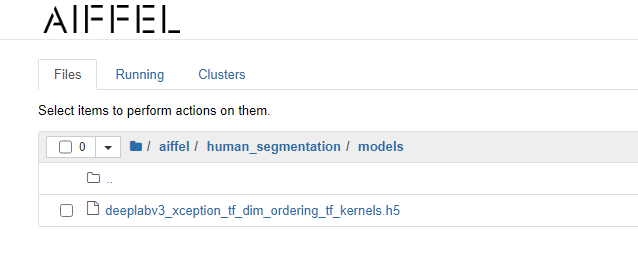

### 2> 다운로드한 모델을 이용해 PixelLib로 우리가 사용할 세그멘테이션 모델을 생성

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

### 3> 모델에 이미지를 입력

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path)

segmentAsPascalvoc라는 함수 이름에서 세그멘테이션 모델에 대한 힌트를 얻을 수 있는데요. 

PASCAL VOC 데이터로 학습된 모델을 이용한다는 의미입니다. 

모델마다 학습시킨 데이터에 따라 결괏값이 달라지므로 어떤 데이터를 학습시켰는지 확인하는 것은 매우 중요합니다.

In [6]:
#PASCAL VOC 데이터의 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

==> 우리는 이 중 사람(person) 라벨, 즉 15를 가진 영역만 검출해 내고 싶습니다

### 4> 모델에서 나온 출력값

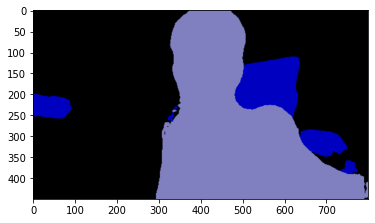

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


output에는 세그멘테이션이 된 결과가 각각 다른 색상으로 담겨 있네요.

segvalues에는 class_ids와 masks가 있습니다. 

class_ids를 통해 어떤 물체가 담겨 있는지 알 수 있군요!

### 5> 이제 물체마다 output에 어떤 색상으로 날까?
==> PixelLib에 따르면 아래와 같은 색을 사용

In [15]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

==> 기억나냐?

'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'

In [13]:
#사람을 나타내는 15번째 색상
colormap[15]

array([192, 128, 128])

==> 맞나 확인
output이미지가 BGR 순서로 배치되어 있으므로
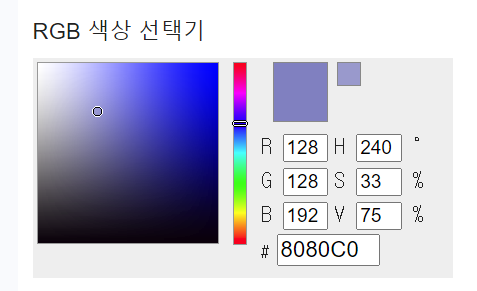

위에서 사람 색과 같음 

In [16]:
# 의자가 나타내는 9번째 색상
colormap[9]

array([192,   0,   0])

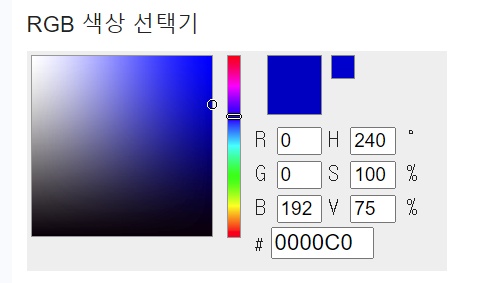

==> 여기서 주의할 것은 output 이미지가 BGR 순서로 채널 배치가 되어 있다는 점이에요. colormap은 RGB 순서이고요.

그러니 우리가 추출해야 하는 색상 값은 순서를 아래처럼 바꿔 줘야 합니다.

### 6> BGR => RGB로 변경

In [17]:
seg_color = (128,128,192)

### 7> seg_color로만 이루어진 마스크를 만들기
==> output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)

(450, 800)


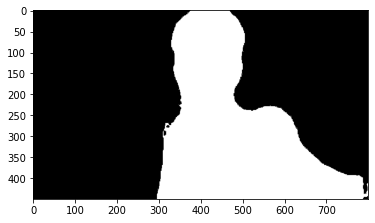

In [18]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

### 8> 원래 이미지와 겹치기

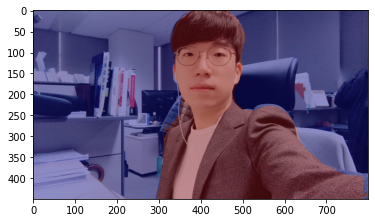

In [20]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 7-6. 셸로우 포커스 만들기 (4) 배경 흐리게 하기
이번에는 배경을 흐리게 만듭니다. 

blur() 함수를 이용합니다.

### 1> 배경을 흐리게 만들기  - blur()



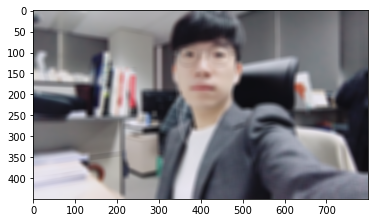

In [21]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 2> 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출

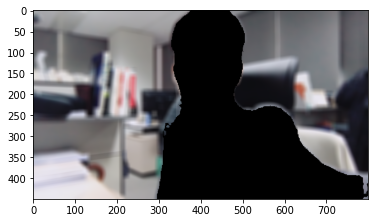

In [25]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) #배경255 사람 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask) #이미지에서 배경만 얻기 (사람이 0인 경우에는 사람이 있던 모든 픽셀이 0)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

bitwise_not 함수를 이용하면 이미지가 반전됩니다. 
원래 마스크에서는 배경이 0, 사람이 255였으니 bitwise_not 연산을 하고 나면 배경은 255, 사람은 0이 되겠죠?

반전된 세그멘테이션 결과를 이용해서 이미지와 bitwise_and 연산을 수행하면 배경만 있는 영상을 얻을 수 있습니다. 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지게 되는 거죠.

## 7-7. 셸로우 포커스 만들기 (6) 흐린 배경과 원본 영상 합성

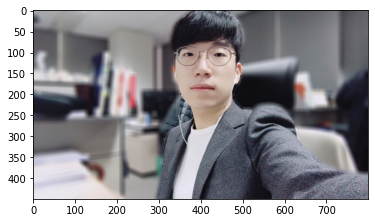

In [23]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)  #img_orig 원본이미지 , 흐려진배경이미지 
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

==> 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 아닌 영역은 블러된 이미지 값을 사용합니다. 

np.where(조건, 참일때, 거짓일때)의 형식의 코드를 사용했네요.

# 프로젝트: 인물 모드 문제점 찾기

## Step 1. 인물모드 직접 해 보기

## 아들사진 ^^

(640, 480, 3)


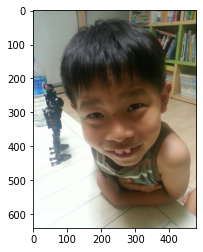

In [28]:
#라이브러리 준비
import os
import urllib #웹에서 데이터를 다운로드할 때 사용
import cv2 #OpenCV 라이브러리로 이미지를 처리하기 위해 필요
import numpy as np
from pixellib.semantic import semantic_segmentation #시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
from matplotlib import pyplot as plt

img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_img.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

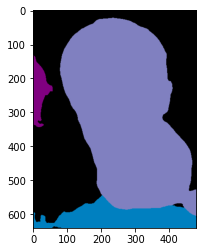

In [29]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

In [30]:
# 뭘로 인식할깨 
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
diningtable
person


In [33]:
seg_color = (128,128,192)

(640, 480)


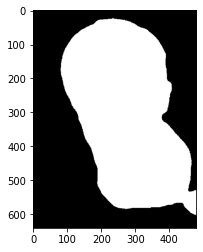

In [34]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

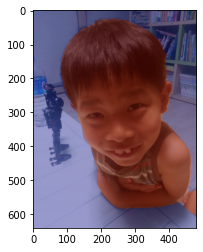

In [35]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

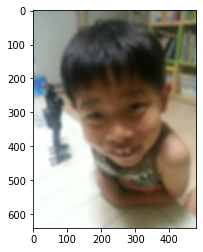

In [36]:
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

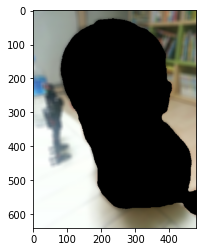

In [37]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) #배경255 사람 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask) #이미지에서 배경만 얻기 (사람이 0인 경우에는 사람이 있던 모든 픽셀이 0)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

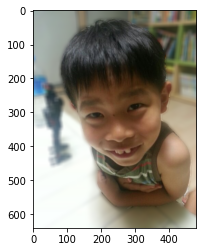

In [38]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)  #img_orig 원본이미지 , 흐려진배경이미지 
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 해변에 있는 강아지 

(420, 420, 3)


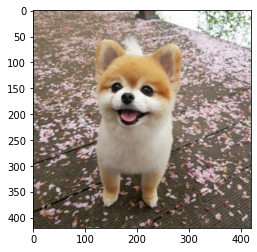

In [39]:
#라이브러리 준비
import os
import urllib #웹에서 데이터를 다운로드할 때 사용
import cv2 #OpenCV 라이브러리로 이미지를 처리하기 위해 필요
import numpy as np
from pixellib.semantic import semantic_segmentation #시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
from matplotlib import pyplot as plt

img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_dog.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

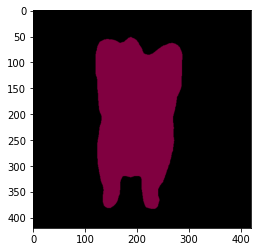

In [40]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()  #[ 64,   0, 128]

In [41]:
# 뭘로 인식할깨 
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [57]:
seg_color = (128,0,64)  #[ 64,   0, 128]

(420, 420)


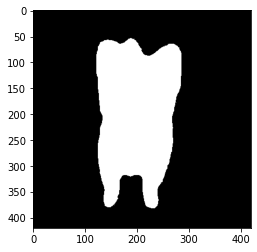

In [58]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

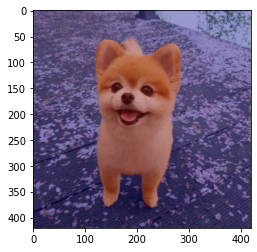

In [59]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

(420, 420, 3)


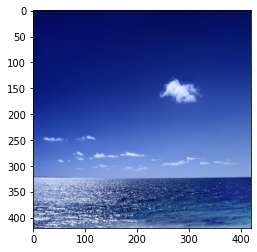

In [61]:
#흐린 배경 만들기

img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_sea.jpg'  
img_orig_back = cv2.imread(img_path) 

img_orig_back = cv2.resize(img_orig_back, (420,420)) #강아지 크기로 맞추기
print(img_orig_back.shape)

plt.imshow(cv2.cvtColor(img_orig_back, cv2.COLOR_BGR2RGB))
plt.show()

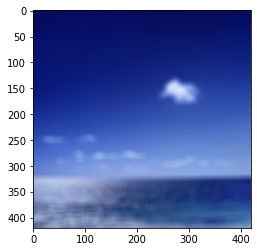

In [62]:
img_orig_blur = cv2.blur(img_orig_back, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

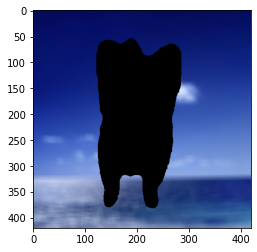

In [66]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) #배경255 사람 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask) #이미지에서 배경만 얻기 (사람이 0인 경우에는 사람이 있던 모든 픽셀이 0)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

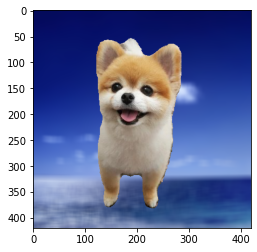

In [67]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)  #img_orig 원본이미지 , 흐려진배경이미지 
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 산에 있는 강아지

(420, 420, 3)


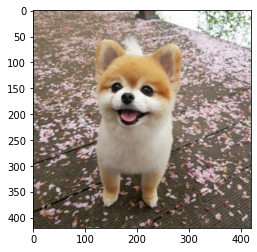

In [68]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_dog.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

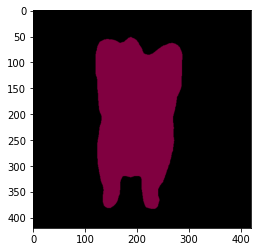

In [69]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()  #[ 64,   0, 128]

In [70]:
# 뭘로 인식할깨 
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [71]:
seg_color = (128,0,64)  #[ 64,   0, 128]

(420, 420)


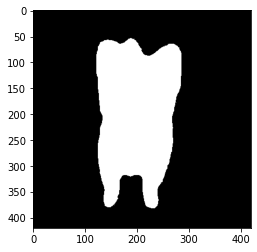

In [72]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

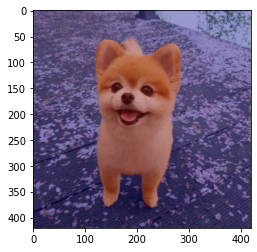

In [73]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

(420, 420, 3)


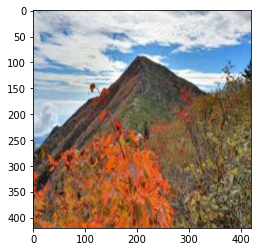

In [76]:
#흐린 배경 만들기

img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_muntin.jpg'  
img_orig_back = cv2.imread(img_path) 

img_orig_back = cv2.resize(img_orig_back, (420,420)) #강아지 크기로 맞추기
print(img_orig_back.shape)

plt.imshow(cv2.cvtColor(img_orig_back, cv2.COLOR_BGR2RGB))
plt.show()

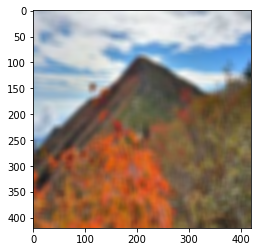

In [77]:
img_orig_blur = cv2.blur(img_orig_back, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

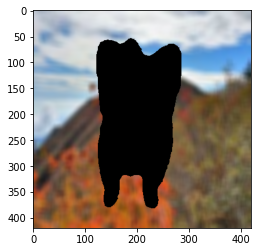

In [78]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) #배경255 사람 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask) #이미지에서 배경만 얻기 (사람이 0인 경우에는 사람이 있던 모든 픽셀이 0)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

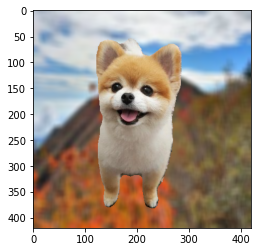

In [79]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)  #img_orig 원본이미지 , 흐려진배경이미지 
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2. 사진에서 문제점 찾기

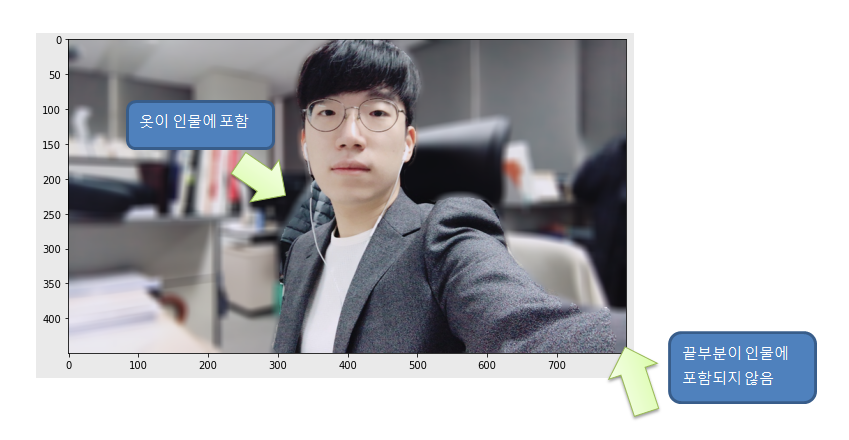

## 내가 만든 이미지들은 문제 없지롱~~~~

## Step 3. 해결 방법을 제안해 보기

### ==> 이미지를 크게( * 1.8)  해보면 어떨까

(864, 1440, 3)


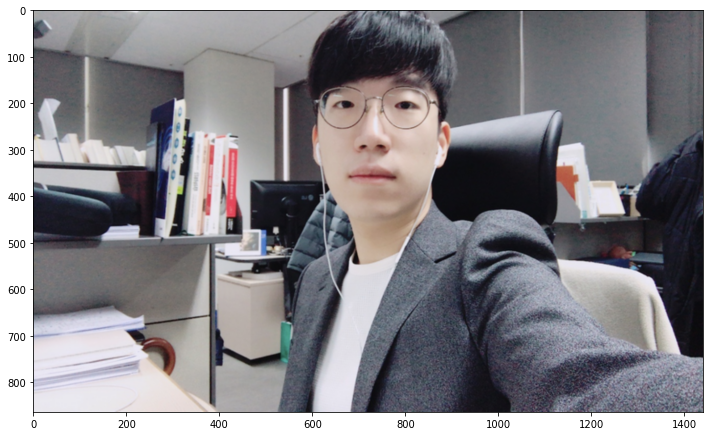

In [139]:
#라이브러리 준비
import os
import urllib #웹에서 데이터를 다운로드할 때 사용
import cv2 #OpenCV 라이브러리로 이미지를 처리하기 위해 필요
import numpy as np
from pixellib.semantic import semantic_segmentation #시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
from matplotlib import pyplot as plt

img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  

img_orig = cv2.imread(img_path) 
img_orig = cv2.resize(img_orig, (1440,864)) #이미지를 크게

print(img_orig.shape)
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

(450, 800, 3)
(864, 1440, 3)


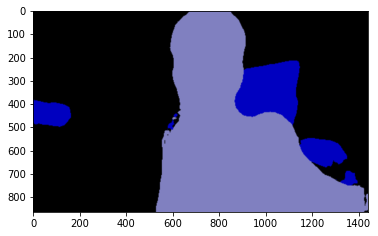

In [140]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

segvalues, output = model.segmentAsPascalvoc(img_path)

print(output.shape)
output = cv2.resize(output, (1440,864)) #이미지를 크게
print(output.shape)
plt.imshow(output)
plt.show()


# instance_seg = instance_segmentation()
# instance_seg.load_model("mask_rcnn_coco.h5")
# segmask, output = instance_seg.segmentImage("sample2.jpg", show_bboxes= True)
# cv2.imwrite("img.jpg", output)
# print(output.shape)


In [129]:
# 뭘로 인식할깨 
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [130]:
seg_color = (128,128,192)

(864, 1440)


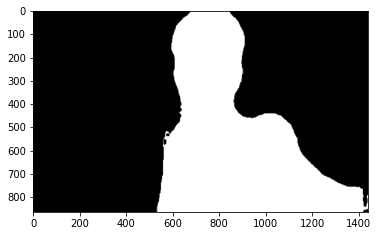

In [131]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

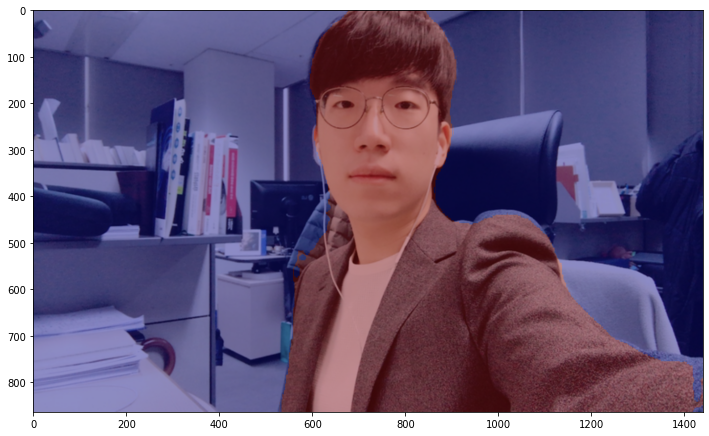

In [132]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 같은 현상임 ㅠㅠ